In [1]:
import matplotlib.pyplot as plt
import photutils
import pandas as pd
from astropy.visualization import astropy_mpl_style
from astropy.visualization import simple_norm
# plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import glob
fpath = '/Users/Thomas/OneDrive/Desktop/2022-09-01/'
mist = glob.glob(fpath+'Data2/New_FITS_Headers/'+'*.fits')

image_file = get_pkg_data_filename(mist[2])
fits.info(image_file)
print(image_file)

'H81'

Filename: \Users\Thomas\OneDrive\Desktop\2022-09-01\Data2\New_FITS_Headers\WCS CCD Image 238.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     746   (2048, 512)   int16 (rescales to uint16)   
\Users\Thomas\OneDrive\Desktop\2022-09-01\Data2\New_FITS_Headers\WCS CCD Image 238.fits


'H81'

In [4]:
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from photutils.aperture import SkyCircularAperture
# from photutils.datasets import load_spitzer_image, load_spitzer_catalog
# hdu = load_spitzer_image()  
hdul = fits.open(image_file)
hdu = hdul[0]
image_data = fits.getdata(image_file, ext=0)
# data = u.Quantity(hdu.data, unit=hdu.header['BUNIT'])  
data = image_data


wcs = WCS(hdu.header)  
# catalog = load_spitzer_catalog() 

In [15]:
hdul[0].header['JD']

2459824.5522569446

In [35]:
from astroquery.jplhorizons import Horizons
RA = []
DEC = []

obj = Horizons(id='1941 SJ', location='H81', epochs=hdul[0].header['JD'])
RA.append(obj.ephemerides()['RA'][0])
DEC.append(obj.ephemerides()['DEC'][0])
# print(obj.ephemerides()['RA'])
# print(obj.ephemerides()['DEC'][0])

    RA   
   deg   
---------
314.39817


In [54]:

# RA:
# 20h, 57m, 50.3355908660s
# 20h 57m 24.3835886736s


# DEC:
# -004326.190526080
# -004334.439038464
#  '20:57:24.3835886736 -00:43:34.439038464'

c1 = SkyCoord('20:57:50.3355908660 -00:43:26.190526080', unit=(u.hourangle, u.deg))
c2 = SkyCoord('20:57:24.3835886736 -00:43:34.439038464', unit=(u.hourangle, u.deg))
print(c1.ra.degree)
print(c2.ra.degree)
RA_ref = [c1.ra.degree, c2.ra.degree]
DEC_ref = [c1.dec.degree, c2.dec.degree]

314.45973162860827
314.35159828613996


In [55]:
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level fram
positions = SkyCoord(RA, DEC, frame='icrs', unit = 'deg')
ref_stars = SkyCoord(RA_ref, DEC_ref, frame='icrs', unit = 'deg')

# ref_stars = SkyCoord(RA, DEC, frame='icrs')
aperture = SkyCircularAperture(positions, r=4.8 * u.arcsec)  
aperture_ref = SkyCircularAperture(ref_stars, r=4.8 * u.arcsec)  

AttributeError: 'SkyCircularAperture' object has no attribute 'plot'

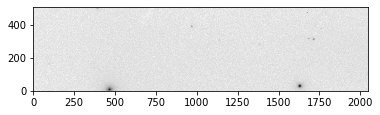

In [56]:
norm = simple_norm(image_data, 'log')

plt.imshow(image_data, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
aperture.plot(color='blue', lw=1.5, alpha=0.5)

In [57]:
from photutils.aperture import aperture_photometry
phot_table = aperture_photometry(data, aperture, wcs=wcs)  

In [58]:
import astropy.units as u
factor = (1.2 * u.arcsec) ** 2 / u.pixel
fluxes_catalog = catalog['f4_5']  
converted_aperture_sum = (phot_table['aperture_sum'] *
                          factor).to(u.mJy / u.pixel)  

NameError: name 'catalog' is not defined

Text(0, 0.5, 'Aperture photometry fluxes')

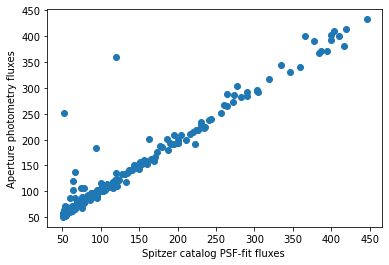

In [18]:
import matplotlib.pyplot as plt
plt.scatter(fluxes_catalog, converted_aperture_sum.value)
plt.xlabel('Spitzer catalog PSF-fit fluxes ')
plt.ylabel('Aperture photometry fluxes')

In [19]:
hdu

In [20]:
fits.getdata(image_file)

array([[160, 157, 159, ..., 159, 158, 158],
       [160, 160, 158, ..., 161, 160, 159],
       [160, 156, 159, ..., 163, 163, 160],
       ...,
       [156, 156, 157, ..., 160, 157, 158],
       [159, 156, 159, ..., 160, 157, 156],
       [158, 159, 157, ..., 159, 160, 156]], dtype=uint16)

In [24]:
hdul[0]